# Init

In [3]:
from IPython.core.display import HTML
HTML("<style>.container { width:98% !important; }</style>")

In [4]:
import cPickle
import gzip

import numpy as np
import pylab
from pylab import subplot,subplot2grid,figure,plot,matshow
%matplotlib inline

from src.utils import *

Select whether you want to generate/overwrite the data

In [5]:
export_data=False

In [11]:
export_data=True

# F 0-4

In [25]:
def F0(x):
    x1,x2,x3,x4 = x
    return [(np.sin(x1*np.pi)+np.sin(x2*np.pi*2+np.pi/8)+x2-x3*x4)/3.0]
def F1(x):
    x1,x2,x3,x4 = x
    return [(np.sin(x1*np.pi)+np.sin(x2*np.pi*2+np.pi/8)+x2-x3*x4)/3.0]
def F2(x):    
    x1,x2,x3,x4 = x
    return [(np.sin(x1*np.pi)+x2*np.cos(x1*np.pi*2+np.pi/4)+x3-x4*x4)/3.0]
def F3(x):
    x1,x2,x3,x4 = x
    return [((1+x2)*np.sin(x1*np.pi) + x2*x3*x4)/3.0]
def F4(x):
    x1,x2,x3,x4 = x
    return [(np.sin(x1*np.pi)+np.cos(x2*np.sin(x1*np.pi)*2)+ x2*x3*x4)/2.0]

In [26]:
fun = F0
name = "f0"

In [26]:
fun = F1
name = "f1"

In [37]:
fun = F2
name = "f2"

In [42]:
fun = F3
name = "f3"

In [47]:
fun = F4
name = "f4"

min max for training:  [-1.00348226] [ 1.01420701]


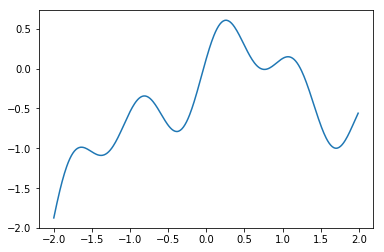

In [27]:
inputs=2*np.random.rand(10000,4)-1
outputs=np.asarray([fun(x) for x in inputs])
print "min max for training: ", min(outputs), max(outputs)
xs=np.arange(-2,2,0.01)
inputs=np.asarray([[x,x,x,x] for x in xs])
outputs=np.asarray([fun(x) for x in inputs])
plot(xs,outputs)

### Training and Test Data

main training data [-1,1]

In [28]:
n_in=4
n_out=1
n_num=10000;
noise=0.01
inputs=1*(2*np.random.rand(n_num,n_in)-1)
outputs=addNoise(np.asarray([fun(x) for x in inputs]),noise)
print min(outputs), max(outputs)
datfull = splitDataSet(inputs,outputs)
if export_data:
    cPickle.dump(datfull, gzip.open("data/" + name + "-n-10k-1.dat.gz","wb"))

[-0.99573596] [ 1.05433254]


interpolation and extrapolation test data

In [29]:
n_num=5000;
inputs=1*(2*np.random.rand(n_num,n_in)-1)
outputs=addNoise(np.asarray([fun(x) for x in inputs]),noise)
dat=((inputs,outputs),())
if export_data:
    cPickle.dump(dat, gzip.open("data/" + name + "-n-5k-1-test.dat.gz","wb"))
print min(outputs), max(outputs)
    
# we generate more data and select then "num" from the outside
inputs = 2*(2*np.random.rand(4*n_num,n_in)-1)
outputs= addNoise(np.asarray([fun(x) for x in inputs]),noise)
(inside,outside) = cutDataSet(inputs,outputs,1.0)
dat_extra = ((outside[0][:n_num],outside[1][:n_num]),())
assert(len(dat_extra[0][1])==n_num)
if export_data:
    cPickle.dump(dat_extra, gzip.open("data/" + name + "-n-5k-1-2-test.dat.gz","wb"))
print min(outputs), max(outputs)

[-0.96749767] [ 1.01764151]
[-2.29945704] [ 2.26266012]


extrapolation - validation

In [51]:
dat_extra_val = ((outside[0][n_num:n_num+50],outside[1][n_num:n_num+50]),())
assert(len(dat_extra_val[0][1])==50)
if export_data:
    cPickle.dump(dat_extra_val, gzip.open("data/" + name + "-n-50-1-2-extrapol-validation.dat.gz","wb"))
print min(outputs), max(outputs)

[-4.64322261] [ 4.05898611]


# Cart-pole

In [52]:
def CartPendulum(inp):
    x,theta,v,omega = inp # position x, angle theta and vel. v and angle vel. omega
    m=1
    M=1
    R=1
    g=9.81
    b=0.1
    d=0.01
    k=1
    sin=np.sin
    cos=np.cos
    sqr=np.square
    return [v, 
            omega, 
            (m*R*sqr(omega)*sin(theta) + m*g*sin(theta)*cos(theta) - k*x - d*v + b/R*omega*cos(theta))/(M + m*sqr(sin(theta))),
            (-m*R*sqr(omega)*sin(theta)*cos(theta) - (m+M)*g*sin(theta) + k*x*cos(theta) + d*v*cos(theta) - (1 + M/m)*b/R*omega) 
            /(R*(M + m*sqr(sin(theta))))
           ]
def cp_inp(o):
    return o*[1,np.pi/2,1,1]
def cp_normalize(o):
    return o/[1,1,5,10]
CartPendulum([1,np.pi/2,2,2])

[2, 2, 1.4900000000000004, -10.01]

http://www.myphysicslab.com/pendulum_cart.html

$\large x' = v$

$\large θ' = ω$

$\large v' =  	\frac{m R ω^2 sin θ + m g sin θ cos θ − k x − d v + b/R ω cos θ)}{M + m sin^2 θ}$

$\large ω' =  	\frac{−m R ω^2 sin θ cos θ − (m+M)g sin θ + k x cos θ + d v cos θ − (1 + M/m)b/R ω)}{R (M + m sin^{2}θ)}$

$R = length of rod (constant)$

$M = mass of cart$

$m = mass of pendulum$

$g = gravitational constant$

$d = cart friction constant$

$b = pendulum friction constant$

$k = spring stiffness$

$ \Large \frac{-0.01x_3 - x_1 + x_4^{2}sin(x_2) + 0.1x_4cos(x_2) + 9.81sin(x_2)cos(x_2))}{sin^{2}(x_2)+1}$


$\Large \frac{0.01x_3cos(x_2) - 0.2x_4 - 19.62sin(x_2) + x_1cos(x_2) - x_4^{2}sin(x_2)cos(x_2)}{sin^{2}(x_2)+1}$

### Inspection

In [53]:
inputs=2*np.random.rand(10000,4)-1
outputs=np.asarray([CartPendulum(cp_inp(x)) for x in inputs])
print np.min(outputs,axis=0), np.max(outputs,axis=0)

[ -0.99967584  -0.99983637  -4.58161821 -10.29409256] [  0.99989218   0.99981174   4.58309245  10.30641089]


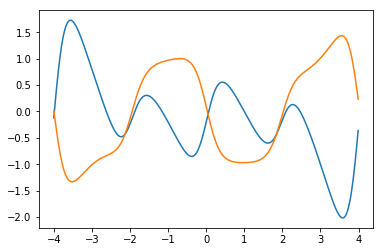

In [54]:
xs=np.arange(-4,4,0.01)
inputs=np.asarray([[1,x,0,-x] for x in xs])
outputs=cp_normalize(np.asarray([CartPendulum(cp_inp(x)) for x in inputs]))
plot(xs[:],outputs[:,[2,3]])

In [55]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [56]:
xs=np.arange(-3,3,0.05)
ys=np.arange(-3,3,0.05)
(x,y) = np.meshgrid(xs,ys,sparse=False, indexing='ij')
z = np.asarray([[ cp_normalize(np.asarray(CartPendulum(cp_inp(np.asarray([1.0,x[i,j],0.0,y[i,j]]))))) for i in range(len(xs))] for j in range(len(ys))])
print(x.shape,y.shape,z.shape)

((120, 120), (120, 120), (120, 120, 4))


In [11]:
%matplotlib qt

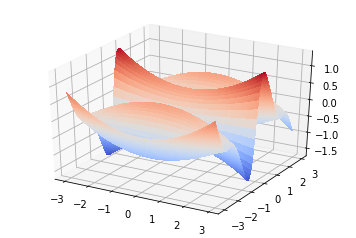

In [57]:
fig = pylab.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z[:,:,2], rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

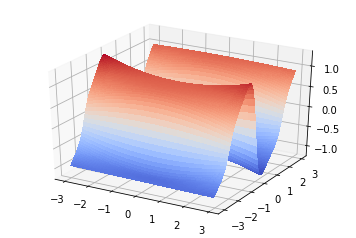

In [13]:
fig = pylab.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z[:,:,3], rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [14]:
%matplotlib inline

### Create Dataset files

In [58]:
n_in=4
n_out=1
n_num=20000;
noise=0.1;
inputs=1*(2*np.random.rand(n_num,n_in)-1)
outputs=addNoise(cp_normalize(np.asarray([CartPendulum(cp_inp(x)) for x in inputs])),noise)
print np.min(outputs), np.max(outputs)
datfull = splitDataSet(inputs,outputs)
if export_data:
    cPickle.dump(datfull, gzip.open("data/cp-n-20k-1.dat.gz","wb"))

-1.49988656883 1.49998497791


In [16]:
n_num=10000;
inputs=1*(2*np.random.rand(n_num,n_in)-1)
outputs=addNoise(cp_normalize(np.asarray([CartPendulum(cp_inp(x)) for x in inputs])),noise)
dat=((inputs,outputs),())
if export_data:
    cPickle.dump(dat, gzip.open("data/cp-n-10k-1-test.dat.gz","wb"))
    
inputs = 2*(2*np.random.rand(4*n_num,n_in)-1)
outputs=addNoise(cp_normalize(np.asarray([CartPendulum(cp_inp(x)) for x in inputs])),noise)

(inside,outside) = cutDataSet(inputs,outputs,1.0)
dat = ((outside[0][:n_num],outside[1][:n_num]),())
assert(len(dat[0][1])==n_num)
if export_data:
    cPickle.dump(dat, gzip.open("data/cp-n-10k-1-2-test.dat.gz","wb"))
print np.min(outputs), np.max(outputs)

-2.999717921109589 2.999979160380284


Extrapolation - Validation

In [23]:
dat_extra_val = ((outside[0][n_num:n_num+50],outside[1][n_num:n_num+50]),())
assert(len(dat_extra_val[0][1])==50)
if export_data:
    cPickle.dump(dat_extra_val, gzip.open("data/cp-n-50-1-2-extrapol-validation.dat.gz","wb"))
print min(outputs), max(outputs)

[-1.01402878] [ 1.01475109]


# DIV

In [17]:
def Fdivision(x):
    x1,x2 = x
    return [np.sin(3.14*x1)/(x2*x2 + 1)]
name = "div"

min max for training:  [-0.99945552] [ 0.99968093]


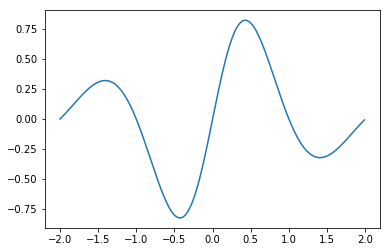

In [18]:
inputs=2*np.random.rand(10000,2)-1
outputs=np.asarray([Fdivision(x) for x in inputs])
print "min max for training: ", min(outputs), max(outputs)
xs=np.arange(-2,2,0.01)
inputs=np.asarray([[x,x] for x in xs])
outputs=np.asarray([Fdivision(x) for x in inputs])
plot(xs,outputs)

In [19]:
n_in=2
n_out=1
n_num=10000;
noise=0.01
inputs=1*(2*np.random.rand(n_num,n_in) - 1)
outputs=addNoise(np.asarray([Fdivision(x) for x in inputs]), noise)
print min(outputs), max(outputs)
datfull = splitDataSet(inputs,outputs)
if export_data:
    cPickle.dump(datfull, gzip.open("data/" + name + "-n-10k-1.dat.gz","wb"))

[-1.01701846] [ 1.01246301]


In [20]:
n_num=5000;
inputs=1*(2*np.random.rand(n_num,n_in)-1)
outputs=addNoise(np.asarray([Fdivision(x) for x in inputs]),noise)
dat=((inputs,outputs),())
if export_data:
    cPickle.dump(dat, gzip.open("data/" + name + "-n-5k-1-test.dat.gz","wb"))
print min(outputs), max(outputs)
    
# we generate more data and select then "num" from the outside
inputs = 2*(2*np.random.rand(4*n_num,n_in)-1)
outputs= addNoise(np.asarray([Fdivision(x) for x in inputs]),noise)
(inside,outside) = cutDataSet(inputs,outputs,1.0)
dat_extra = ((outside[0][:n_num],outside[1][:n_num]),())
assert(len(dat_extra[0][1])==n_num)
if export_data:
    cPickle.dump(dat_extra, gzip.open("data/" + name + "-n-5k-1-2-test.dat.gz","wb"))
print min(outputs), max(outputs)

[-1.0135008] [ 1.01840281]
[-1.01402878] [ 1.01475109]
